In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
# import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv('../data/train_ctrUa4K.csv')
test = pd.read_csv('../data/test_lAUu6dG.csv')
train_original = train.copy()
test_original = test.copy()

In [3]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
train.columns, test.columns

(Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
        'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
        'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
       dtype='object'),
 Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
        'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
        'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
       dtype='object'))

In [5]:
train.shape, test.shape

((614, 13), (367, 12))

In [6]:
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 no

(None, None)

In [7]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [9]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

### Visualize Target Variable

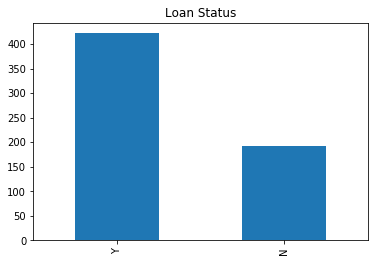

In [10]:
train['Loan_Status'].value_counts().plot.bar(title="Loan Status")

### Visualize Categorical Features

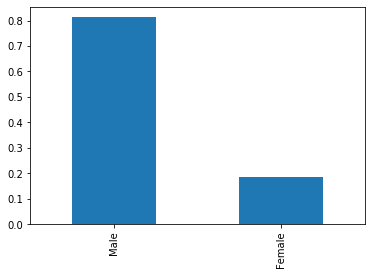

In [11]:
train['Gender'].value_counts(normalize=True).plot.bar()

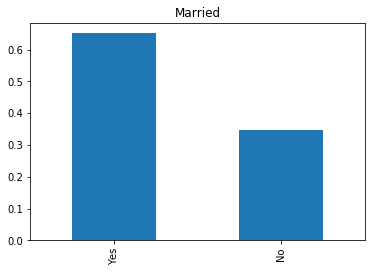

In [12]:
train['Married'].value_counts(normalize=True).plot.bar(title="Married") 

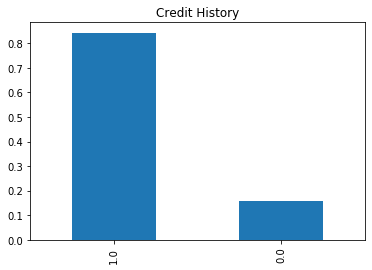

In [13]:
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit History') 


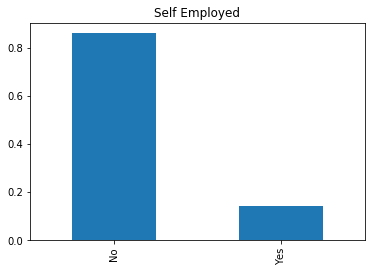

In [14]:
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self Employed')

### Visualize Ordinal Features

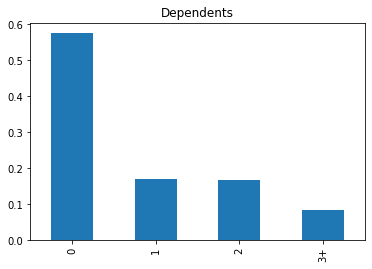

In [15]:
train['Dependents'].value_counts(normalize=True).plot.bar(title='Dependents')

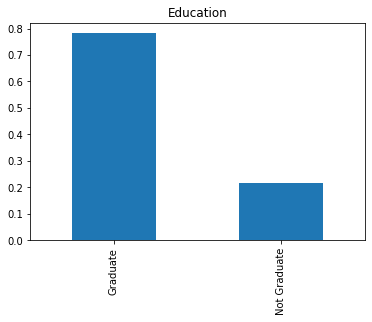

In [16]:
train['Education'].value_counts(normalize=True).plot.bar(title='Education')

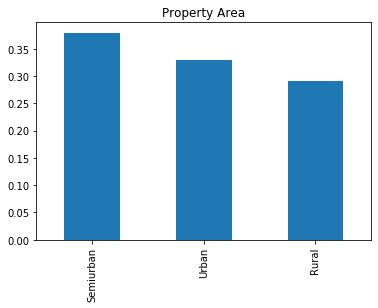

In [17]:
train['Property_Area'].value_counts(normalize=True).plot.bar(title='Property Area')

### Visualize Numerical Features

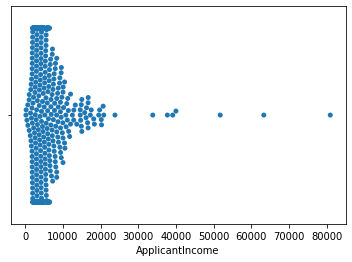

In [18]:
sns.swarmplot(train['ApplicantIncome'])

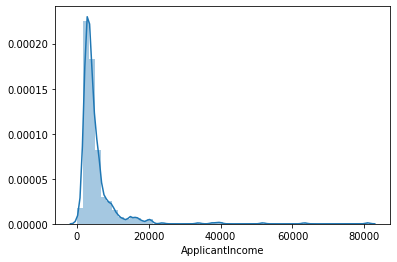

In [19]:
sns.distplot(train['ApplicantIncome'])   #checking distribution of applicants income, its left-skewed distribution

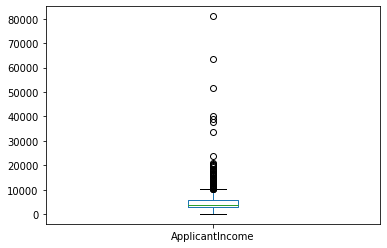

In [20]:
train['ApplicantIncome'].plot.box()
plt.show()

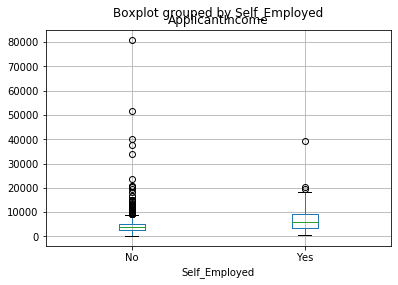

In [21]:
train.boxplot('ApplicantIncome', by = "Self_Employed")
plt.show()

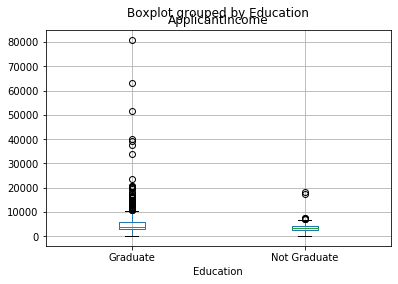

In [22]:
train.boxplot('ApplicantIncome', by = "Education")
plt.show()

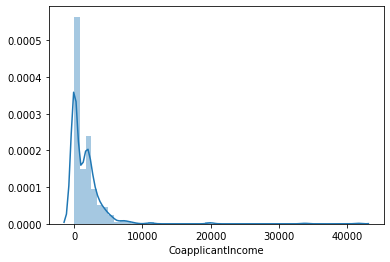

In [23]:
sns.distplot(train['CoapplicantIncome'])

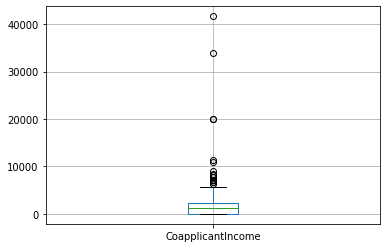

In [24]:
train.boxplot("CoapplicantIncome")

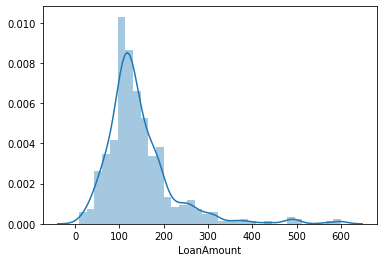

In [25]:
train_valid = train.dropna()   #create a dataframe with no null values
sns.distplot(train_valid['LoanAmount'])

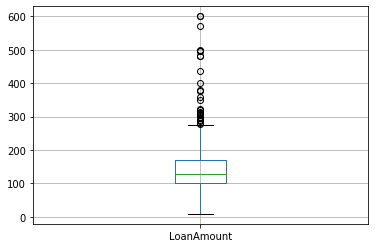

In [26]:
train_valid.boxplot("LoanAmount")

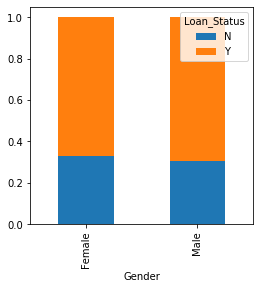

In [27]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status']) 
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

In [28]:
Gender

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


In [29]:
Gender.sum(1)  #Sum of row axis
Gender.sum(0)   #Sum of column axis

Loan_Status
N    187
Y    414
dtype: int64

In [30]:
Gender.div(Gender.sum(1), axis=0) #Divide the crosstab of Gender and Loan Status, i.e Gender, by the sum of its row axis

Loan_Status,N,Y
Gender,,
Female,0.330357,0.669643
Male,0.306748,0.693252


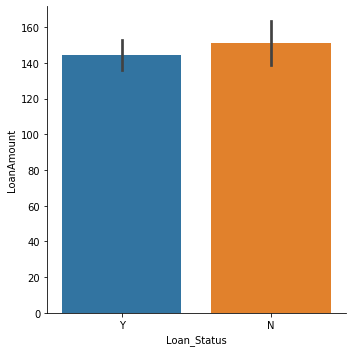

In [31]:
sns.catplot(x='Loan_Status', y='LoanAmount', kind='bar', data=train)

### Handle missing values

In [32]:
train.isnull().sum(),  test.isnull().sum()

(Loan_ID               0
 Gender               13
 Married               3
 Dependents           15
 Education             0
 Self_Employed        32
 ApplicantIncome       0
 CoapplicantIncome     0
 LoanAmount           22
 Loan_Amount_Term     14
 Credit_History       50
 Property_Area         0
 Loan_Status           0
 dtype: int64, Loan_ID               0
 Gender               11
 Married               0
 Dependents           10
 Education             0
 Self_Employed        23
 ApplicantIncome       0
 CoapplicantIncome     0
 LoanAmount            5
 Loan_Amount_Term      6
 Credit_History       29
 Property_Area         0
 dtype: int64)

In [33]:
train.shape

(614, 13)

In [34]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [35]:
train.Loan_Amount_Term.value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [36]:
train.Loan_Amount_Term.fillna(train.Loan_Amount_Term.mode()[0], inplace=True)
train.LoanAmount.fillna(train.LoanAmount.median(), inplace=True)


In [37]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [38]:
test['Gender'].fillna(test['Gender'].mode()[0], inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace=True)

In [39]:
test.Loan_Amount_Term.fillna(test.Loan_Amount_Term.mode()[0], inplace=True)
test.LoanAmount.fillna(test.LoanAmount.median(), inplace=True)

In [40]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

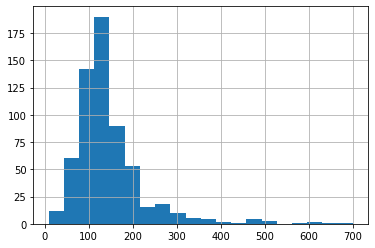

In [41]:
train['LoanAmount'].hist(bins=20)

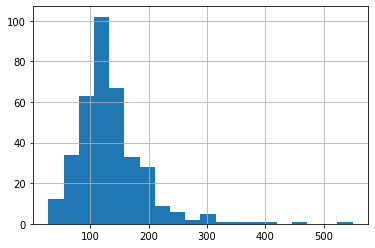

In [42]:
test['LoanAmount'].hist(bins=20)

In [43]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
test['LoanAmount_log'] = np.log(test['LoanAmount'])

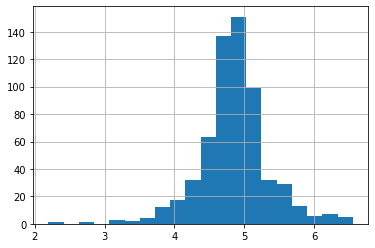

In [44]:
train['LoanAmount_log'].hist(bins=20)

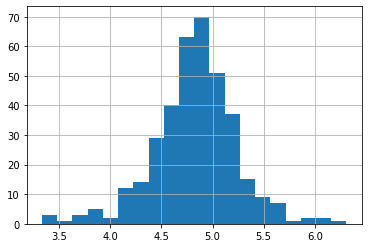

In [45]:
test['LoanAmount_log'].hist(bins=20)

In [46]:
train.isnull().sum()
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
LoanAmount_log       0
dtype: int64

In [47]:
#drop LoanID column as it has no effect on the model's performance
train=train.drop(['Loan_ID', 'LoanAmount_log'], axis=1) 
test=test.drop(['Loan_ID', 'LoanAmount_log'], axis=1)

## Transform Categorical columns to Numerical

In [48]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [49]:
def replace_values(dataframe):
    gender_values = {'Female': 0, 'Male': 1}
    married_values = { 'No': 0, 'Yes': 1}
    dependent_values = {'0': 0, '1':1, '2':2, '3+':3 }
    education_values = {'Graduate' : 0, 'Not Graduate' : 1}
    employed_values = {'No' : 0, 'Yes' : 1}
    property_values = {'Rural' : 0, 'Urban' : 1, 'Semiurban' : 2}
    df_replace = dataframe.replace({'Gender': gender_values, 'Married': married_values, 'Education': education_values, \
                    'Self_Employed': employed_values, 'Property_Area': property_values, \
                    'Dependents': dependent_values}, inplace=True)
    return df_replace

In [50]:
replace_values(train)

In [51]:
replace_values(test)

In [52]:
train.sample(5)
# train.shape

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
358,1,1,0,1,0,3000,1666.0,100.0,480.0,0.0,1,N
551,1,1,1,1,0,2492,2375.0,128.0,360.0,1.0,0,Y
591,1,1,2,0,1,6000,0.0,205.0,240.0,1.0,2,N
461,1,1,3,0,0,7740,0.0,128.0,180.0,1.0,1,Y
186,1,1,1,0,1,2178,0.0,66.0,300.0,0.0,0,N


In [53]:
test.sample(5)
# test.shape

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
78,1,1,1,0,0,3413,4053,125.0,360.0,1.0,2
40,1,1,0,0,0,5629,818,100.0,360.0,1.0,1
206,1,1,1,0,0,4960,2600,187.0,360.0,1.0,2
124,0,0,0,0,0,12500,0,300.0,360.0,0.0,1
299,1,1,2,0,0,4120,0,128.0,360.0,1.0,0


In [54]:
#create a new variable for our target column
X = train.drop('Loan_Status',1) 
y = train.Loan_Status

## Evaluating Model's Performance

In [55]:
#split train set into train and validation
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size=0.25)

In [56]:
#Building a model using LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, recall_score, confusion_matrix
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, \
                   intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1, \
                   penalty='l2', random_state=1, solver='liblinear', tol=0.0001,  \
                   verbose=0, warm_start=False)
pred_cv = lr_model.predict(x_cv)

In [57]:
#Accuracy score
print("Accuracy Score: ", accuracy_score(y_cv, pred_cv))
print("Recall Score:", recall_score(y_cv, pred_cv, pos_label="Y"))
print("Confusion Matrix:", confusion_matrix(y_cv, pred_cv))
print("F1 Score:", f1_score(y_cv, pred_cv, pos_label="Y"))
# roc_auc_score

Accuracy Score:  0.8376623376623377
Recall Score: 0.98
Confusion Matrix: [[31 23]
 [ 2 98]]
F1 Score: 0.8868778280542986


In [58]:
print(np.array(y_cv))
print(np.array(pred_cv))

['Y' 'N' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'Y'
 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'N' 'N' 'N' 'N' 'N'
 'Y' 'N' 'Y' 'Y' 'N' 'N' 'N' 'Y' 'N' 'N' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'N' 'N'
 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'Y'
 'Y' 'Y' 'N' 'N' 'N' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'N' 'N' 'Y' 'Y' 'Y' 'Y'
 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'N' 'N' 'N'
 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'N' 'N' 'Y'
 'N' 'N' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y']
['Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'Y'
 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'N'
 'Y' 'N' 'Y' 'Y' 'N' 'N' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'N'
 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'Y'
 'Y' 'Y' 

In [68]:
y_cv_array = np.array(y_cv)
pred_cv_array = np.array(pred_cv)
def cate_to_num(array):
    for i in range(len(array)):
        if array[i]=='N':
            array[i] = 0
        else:
            array[i] = 1
    return array
# print(y_cv_array)
y_cv_num = cate_to_num(y_cv_array)
pred_cv_num = cate_to_num(pred_cv_array)
print(y_cv_num)
print(pred_cv_num)
# print(cate_to_num(y_cv_array))

[1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 0 0 0 1
 0 1 1 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 0 1 0 0 0 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0
 1 1 1 1 0 1]
[1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1 0 1
 0 1 1 0 0 0 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1
 1 1 1 1 1 1]


In [69]:
print("ROC AUC Score:", roc_auc_score(y_cv_num, pred_cv_num))

ValueError: unknown format is not supported

In [ ]:
pred_test = lr_model.predict(test)
pred_test

## Output model result into a pickle file, to be used as an API

In [ ]:
#export result into a pickle file
import joblib
joblib.dump(lr_model, open('../results/model.pkl', 'wb'))

In [ ]:
model = joblib.load(open('../results/model.pkl', 'rb'))
print(model.predict([[4, 300, 500, 34,24,45,23,12,54, 24,78]]))

### Output result in csv format

In [ ]:
sample_submission = pd.read_csv('../data/sample_submission_49d68Cx.csv')
sample_submission.shape

In [ ]:
sample_submission['Loan_Status'] = pred_test
sample_submission['Loan_ID'] = test_original['Loan_ID'] # a copy of the original test csv in dataframe format
sample_submission['Loan_Status'].replace(0, 'No', inplace=True)
sample_submission['Loan_Status'].replace(1, 'Yes', inplace=True)

In [ ]:
sample_submission.head()

In [ ]:
#convert sample submission to a csv format
pd.DataFrame(sample_submission, columns=['Loan_ID', 'Loan_Status']).to_csv('../results/loan_results.csv', index=False)


# Logistic Regression using stratified k-folds cross validation

In [ ]:
from sklearn.model_selection  import StratifiedKFold 

In [ ]:
i=1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
for train_index, test_index in kf.split(X, y):
    print('%d of kfold %d' % (i, kf.n_splits))
    x_train = X.loc[train_index]
    x_val = X.loc[test_index]
    y_train = y.loc[train_index]
    y_val = y.loc[test_index]
    
    model = LogisticRegression(random_state=1)
    model.fit(x_train, y_train)
    predict_test = model.predict(x_val)
    score = accuracy_score(y_val, predict_test)
    print('accuracy_score = ', score)
    i+=1
print(predict_test.shape)

In [ ]:
predict_probabilty=model.predict_proba(x_val)[:,1]  #probability of results

In [ ]:
# sample_sub.shape
sample_sub_set = sample_submission.iloc[0:122]
test_original_set = test_original.iloc[0:122]
sample_sub_set['Loan_Status']=predict_test
sample_sub_set['Loan_ID'] = test_original_set['Loan_ID'] # a copy of the original test csv in dataframe format
sample_sub_set['Loan_Status'].replace(0, 'N', inplace=True)
sample_sub_set['Loan_Status'].replace(1, 'Y', inplace=True)
sample_sub_set.head()

In [ ]:
pd.DataFrame(sample_sub_set, columns=['Loan_ID','Loan_Status']).to_csv('../results/kfold_results.csv', index=False)